In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = ("~/Downloads/sentiment labelled sentences/yelp_labelled.txt"
            )
sms_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw.columns = ['text', 'sentiment']

In [3]:
sms_raw.head()

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**I transformed the predictor variable - 'sentiment' into features. This set of features is predictively powerful.  The features I chose have the strongest connection to the outcome, which is a negative sentiment.  Words in the text that represent a negative sentiment seemed to be more strongly connected to the outcome than the positive sentiments in the text.  

In [4]:
keywords = ['not', 'overpriced', 'disgusted', 'shocked', 'not', 'never', 'suck', 'bad']
for key in keywords:
     sms_raw[str(key)] = sms_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

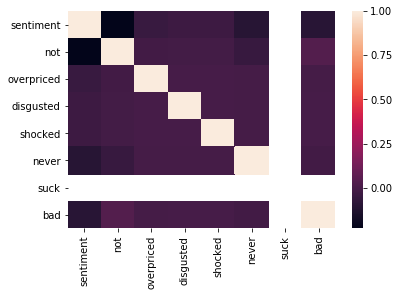

In [7]:
sns.heatmap(sms_raw.corr())

In [8]:
data = sms_raw[keywords]
target = sms_raw['sentiment']

In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 406


In [10]:
target

0      1
1      0
2      0
3      1
4      1
5      0
6      0
7      0
8      1
9      1
10     1
11     0
12     0
13     1
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     1
22     1
23     1
24     1
25     1
26     0
27     1
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: sentiment, Length: 1000, dtype: int64

In [11]:
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [12]:
1000 - 406

594

In [13]:
594 / 1000

0.594

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[113, 387],
       [ 19, 481]])

In [15]:
TP = ((target == 1) & (y_pred == 1)).sum()

In [16]:
print(TP)

481


In [17]:
TN = ((target == 0) & (y_pred == 0)).sum()

In [18]:
print(TN)

113


In [19]:
FP = ((target == 0) & (y_pred == 1)).sum()

In [20]:
print(FP)

387


In [21]:
FN = ((target == 1) & (y_pred == 0)).sum()

In [22]:
print(FN)

19


In [23]:
actual_no = TN + FP

In [24]:
actual_yes = FN + TP

In [25]:
sensitivity = TP / actual_yes

In [26]:
print(sensitivity)

0.962


In [27]:
specificity = TN / actual_no

In [28]:
print(specificity)

0.226


**The model has a high number of false negatives 387 out of 406 errors were from failing to identify a good review.  

In [29]:
113/ (387 + 113)

0.226

**Sensitivity, the percentage of positives identified is 22% 

In [30]:
478 /(478 + 22)

0.956

**Specificity, the percentage of negatives identified is 95%

In [31]:
data_path = ("~/Downloads/sentiment labelled sentences/imdb_labelled.txt"
            )
sms_raw_1 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw_1.columns = ['text', 'sentiment']

In [32]:
sms_raw_1.head()

,text,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [33]:
keywords = ['not', 'disappoint', 'lacks', 'not', 'worst', 'bad', 'boring', 'awful']
for key in keywords:
     sms_raw_1[str(key)] = sms_raw_1.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

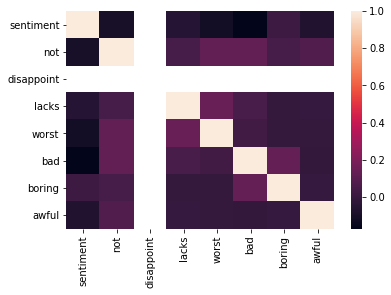

In [34]:
sns.heatmap(sms_raw_1.corr())

In [35]:
data = sms_raw_1[keywords]
target = sms_raw_1['sentiment']

In [36]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 312


In [37]:
target

0      0
1      0
2      0
3      0
4      1
5      0
6      0
7      1
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     0
16     1
17     1
18     1
19     0
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
718    1
719    1
720    0
721    0
722    0
723    1
724    1
725    0
726    1
727    1
728    1
729    1
730    1
731    1
732    1
733    1
734    1
735    1
736    1
737    1
738    1
739    1
740    1
741    1
742    0
743    0
744    0
745    0
746    0
747    0
Name: sentiment, Length: 748, dtype: int64

In [38]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [39]:
748-312

436

In [40]:
436 / 748

0.5828877005347594

In [41]:
data_path = ("~/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt"
            )
sms_raw_2 = pd.read_csv(data_path, delimiter= '\t', header=None)
sms_raw_2.columns = ['text', 'sentiment']

In [42]:
sms_raw_2.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [43]:
keywords = ['good', 'great', 'best', 'well', 'ideal', 'recommend']
for key in keywords:
     sms_raw_2[str(key)] = sms_raw_2.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

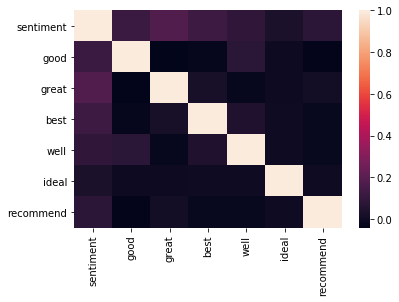

In [44]:
sns.heatmap(sms_raw_2.corr())

In [45]:
data = sms_raw_2[keywords]
target = sms_raw_2['sentiment']

In [46]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 409


In [47]:
1000 - 409

591

In [48]:
591 / 1000

0.591

All tests had a similar result of approximately 59% success rate.  Unlike the spam example, these analyses are a bit harder to sort.  Spam has a typical pattern with keywords that are intentially repeated by the authors of the spand.  Whereas, in the above examples, individuals express their sentiment in ways that produces a range of lexion and terms.  As a result it is harder to define features that predict outcome.  